In [1]:
# -- Packages
import numpy as np
import pandas as pd 
import os
# -- Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
def LinearRegressionCFandDP(df, train_test_ratio):
    

    # Chuyển đổi các cột khác sang dạng số nếu cần thiết
    df['Price'] = df['Price'].str.replace(',', '').astype(float)

    # Chuyển cột 'Date' thành kiểu dữ liệu datetime và đặt làm index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
    df.sort_index(inplace=True) 

    # Tạo các đặc trưng theo chu kỳ ngày tháng
    fourier = CalendarFourier(freq='M', order=4)
    dp = DeterministicProcess(index=df.index.to_period('D'),
                              constant=True,
                              order=1,
                              seasonal=False,
                              additional_terms=[fourier],
                              drop=True)

    # Tạo DataFrame đặc trưng
    X = dp.in_sample()

    # Lấy giá trị mục tiêu
    y = df['Price']

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    train_size = int(len(X) * train_test_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Huấn luyện mô hình hồi quy tuyến tính
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print(f'Testing RMSE: {test_rmse}')
    print(f'Testing MAE: {mae}')
    print(f'Testing MAPE: {mape}')

    # Dự đoán cho 30 ngày tiếp theo
    future_dates_30 = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D').to_period('D')
    X_future_30 = dp.out_of_sample(steps=30)
    y_future_pred_30 = model.predict(X_future_30)

    # Dự đoán cho 60 ngày tiếp theo
    future_dates_60 = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=60, freq='D').to_period('D')
    X_future_60 = dp.out_of_sample(steps=60)
    y_future_pred_60 = model.predict(X_future_60)

    # Dự đoán cho 90 ngày tiếp theo
    future_dates_90 = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=90, freq='D').to_period('D')
    X_future_90 = dp.out_of_sample(steps=90)
    y_future_pred_90 = model.predict(X_future_90)

    # Vẽ dự đoán 30, 60, 90 ngày tiếp theo
    plt.figure(figsize=(14, 7))
    plt.plot(y_train.index, y_train, label='Train Prices')
    plt.plot(y_test.index, y_test, label='Test Prices')
    plt.plot(X_test.index, y_pred, label='Predicted Prices')
    plt.plot(future_dates_90, y_future_pred_90, label='90 Days Prediction')
    plt.plot(future_dates_60, y_future_pred_60, label='60 Days Prediction')
    plt.plot(future_dates_30, y_future_pred_30, label='30 Days Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Future Price Prediction')
    plt.legend()
    plt.show()

<h1>BID</h1>

Chia pha train:test tỉ lệ 6:4

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:568: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


Testing RMSE: 6128.507247029966
Testing MAE: 5257.698033432108
Testing MAPE: 0.1493380739879751


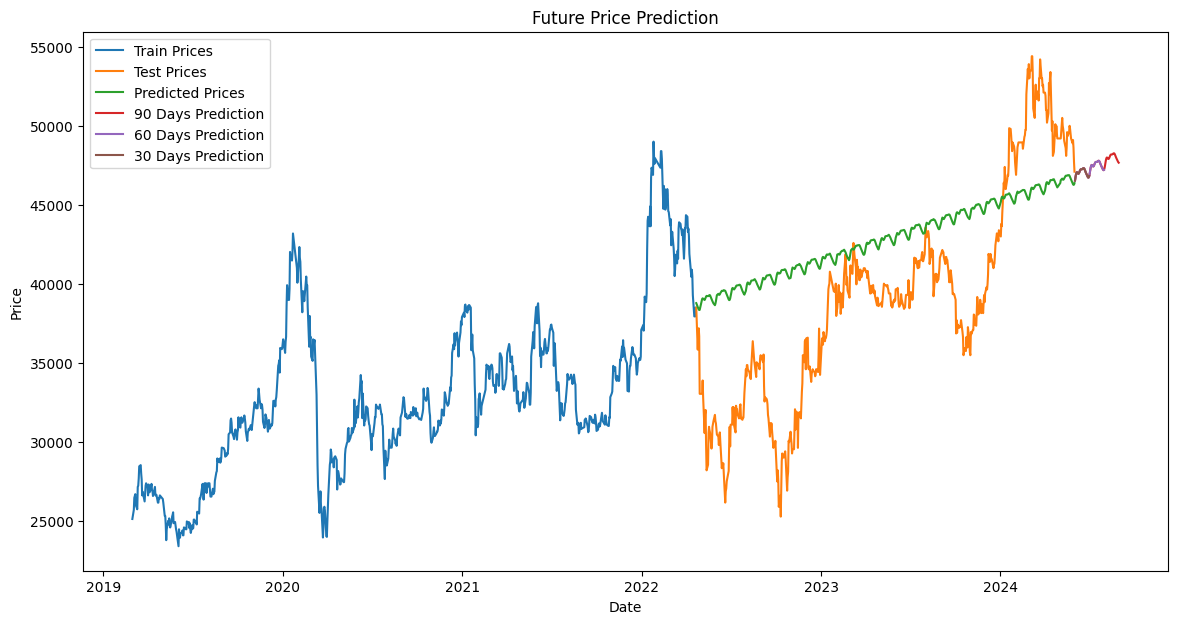

In [3]:
df = pd.read_csv('../data/BID.csv')
LinearRegressionCFandDP(df,0.6)


Chia pha train:test tỉ lệ 7:3

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:568: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


Testing RMSE: 5970.969435247286
Testing MAE: 4499.005381282037
Testing MAPE: 0.10084226820737008


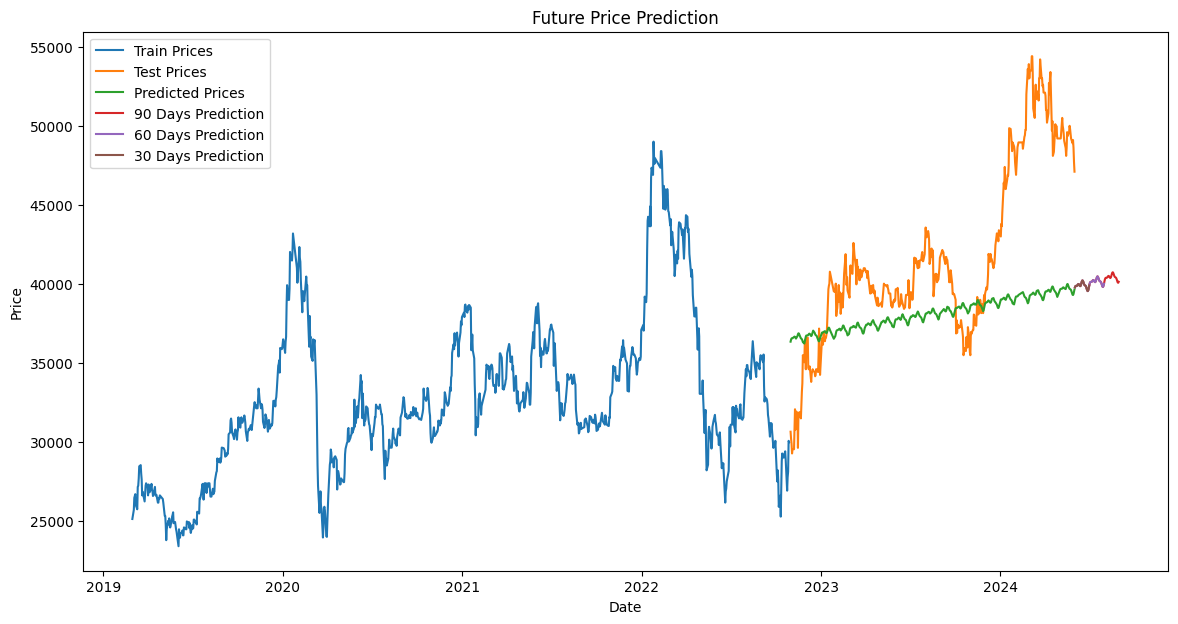

In [4]:
df= pd.read_csv('../data/BID.csv')
LinearRegressionCFandDP(df,0.7)

Chia pha train:test tỉ lệ 8:2

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:568: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


Testing RMSE: 6684.9337649998015
Testing MAE: 5102.8848881054055
Testing MAPE: 0.1075599246893358


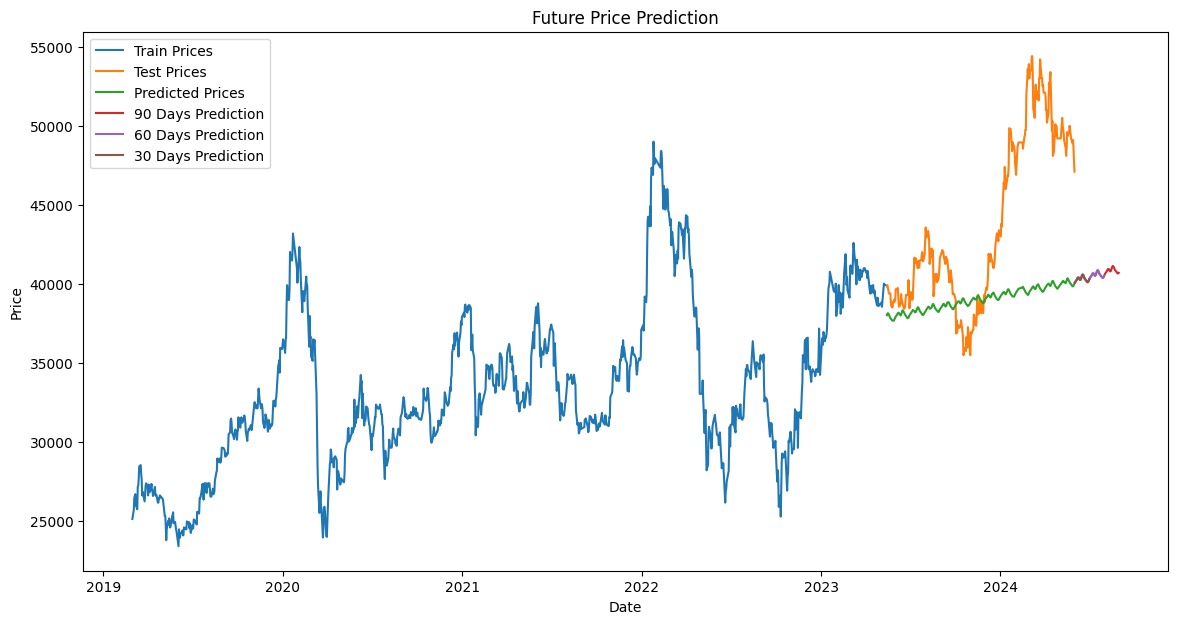

In [5]:
df= pd.read_csv('../data/BID.csv')
LinearRegressionCFandDP(df,0.8)

<h1>STB</h1>

Chia dữ liệu pha train:test theo tỉ lệ 6:4

Testing RMSE: 13767.907486433358
Testing MAE: 13338.539266653717
Testing MAPE: 0.5323432587739312


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:568: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


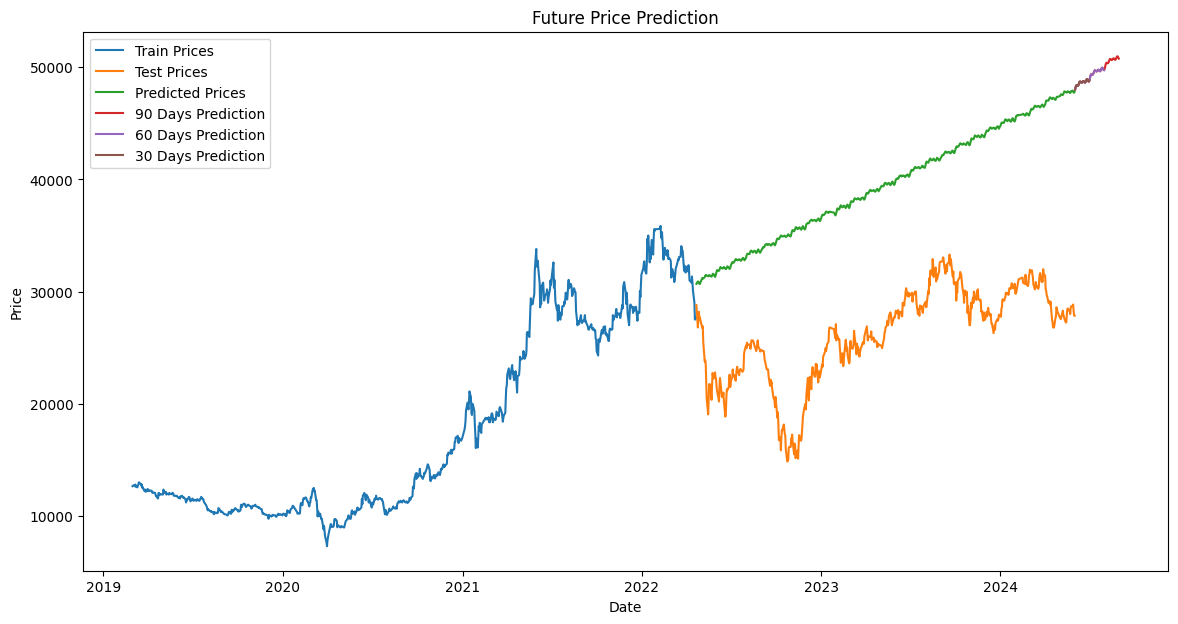

In [6]:
df = pd.read_csv('../data/STB.csv')
LinearRegressionCFandDP(df,0.6)

Chia dữ liệu pha train:test theo tỉ lệ 7:3

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:568: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


Testing RMSE: 7298.70365269705
Testing MAE: 6811.086174732389
Testing MAPE: 0.2657978290119797


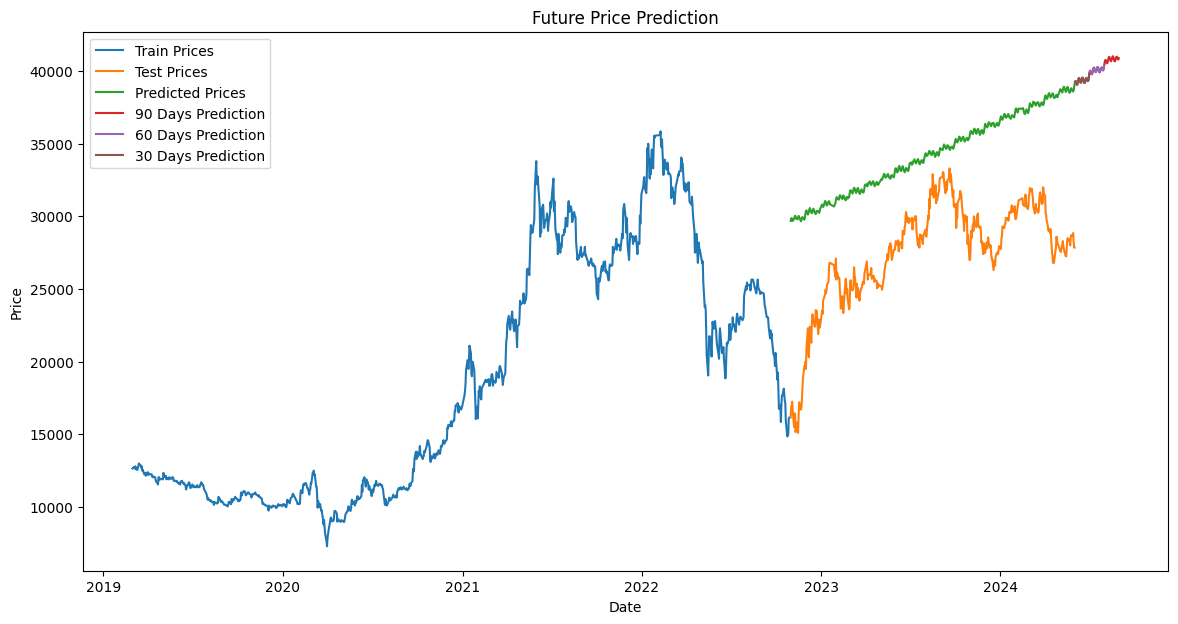

In [7]:
df = pd.read_csv('../data/STB.csv')
LinearRegressionCFandDP(df,0.7)

Chia dữ liệu pha train:test theo tỉ lệ 8:2

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:568: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


Testing RMSE: 3142.112433333327
Testing MAE: 2588.4599882977177
Testing MAPE: 0.08993990315552997


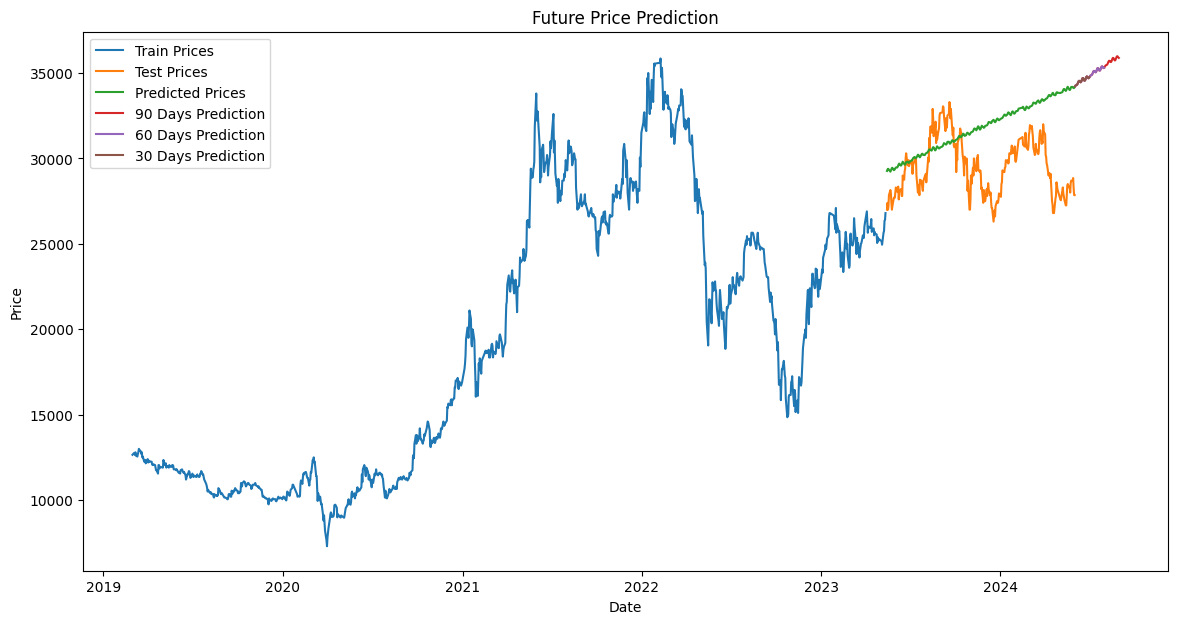

In [8]:
df = pd.read_csv('../data/STB.csv')
LinearRegressionCFandDP(df,0.8)

<h1>VIB</h1>

In [9]:
df = pd.read_csv('../data/VIB.csv')

Chia dữ liệu pha train:test theo tỉ lệ 6:4

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:568: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


Testing RMSE: 23542.580381542193
Testing MAE: 22380.900117000776
Testing MAPE: 1.0848321685044802


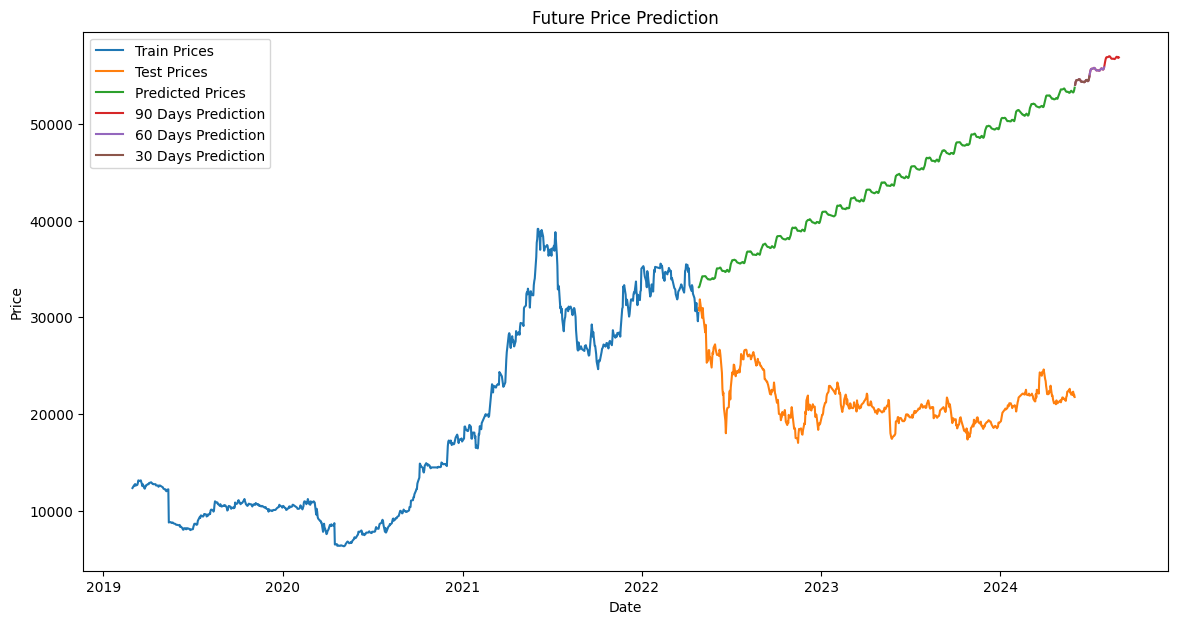

In [10]:
LinearRegressionCFandDP(df,0.6)

Chia dữ liệu pha train:test theo tỉ lệ 7:3

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:568: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


Testing RMSE: 17914.909501017937
Testing MAE: 17632.088040144416
Testing MAPE: 0.8687922531176165


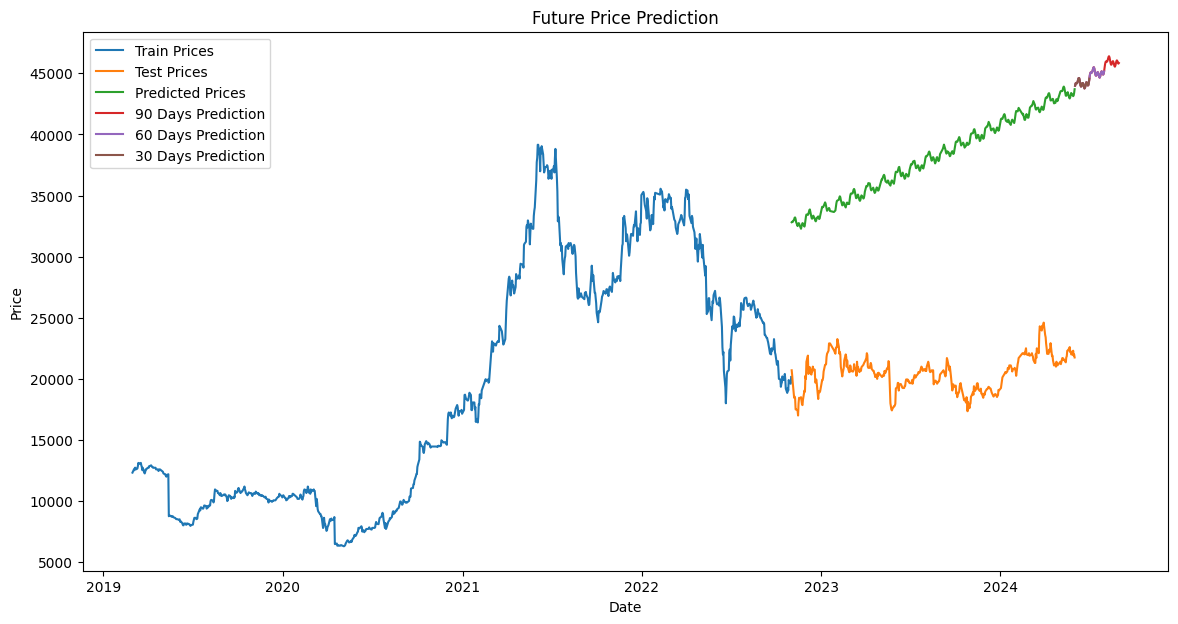

In [11]:
df = pd.read_csv('../data/VIB.csv')
LinearRegressionCFandDP(df,0.7)

Chia dữ liệu pha train:test theo tỉ lệ 8:2

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:568: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


Testing RMSE: 12263.347928417817
Testing MAE: 12184.92487105623
Testing MAPE: 0.603065264246958


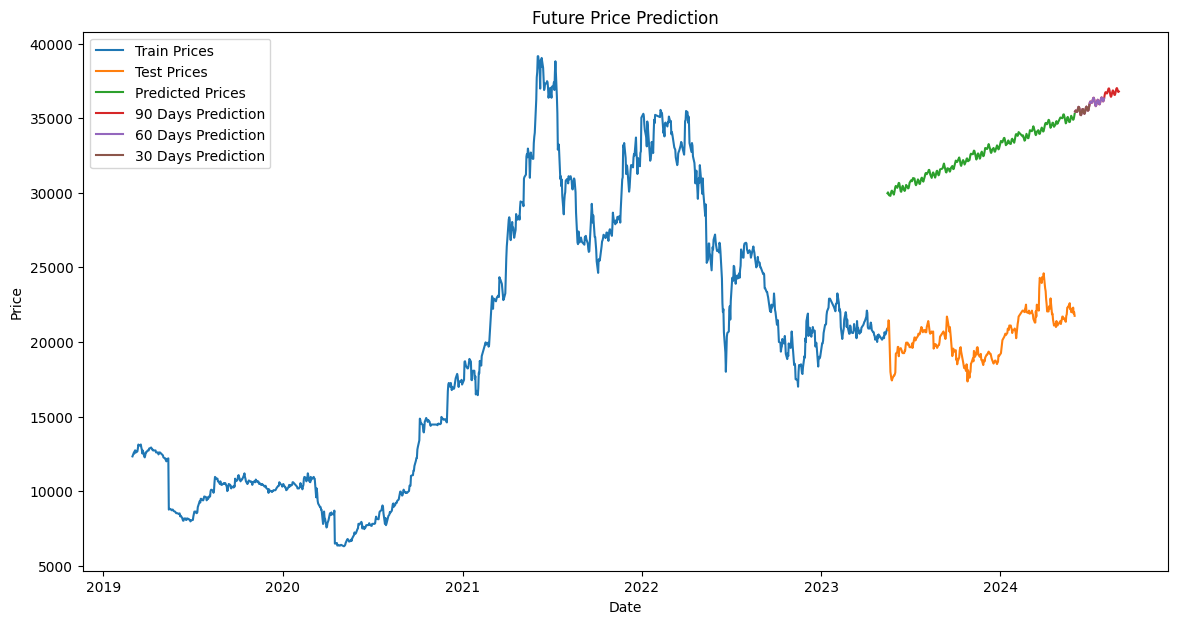

In [12]:
df = pd.read_csv('../data/VIB.csv')
LinearRegressionCFandDP(df,0.8) 